In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [81]:
df = pd.read_csv("C:/Users/abhin/Downloads/titanic (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
# cabin has a lot of null vlaues so it's better to drop it also name will not be useful for our analysis 
# passenger id is also not useful so we will drop it
# Ticket has high cardinality. This can lead to overfitting. So we will drop it as well
df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [83]:
df['Embarked'].fillna('S',inplace=True) 
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_39428\218973419.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_39428\218973419.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [84]:
#X contains every column except the target variable
X = df.drop('Survived',axis=1)
#target variable
Y = df['Survived']
# Set the random seed for reproducibility
np.random.seed(42)

# Shuffle the indices
shuffled_indices = np.random.permutation(len(X))

# Define the split index
split_index = int(len(X) * 0.8)

# Split the indices into training and testing sets
train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]

# Split the data into training and testing sets
X_train = X.iloc[train_indices]
X_test = X.iloc[test_indices]
Y_train = Y.iloc[train_indices]
Y_test = Y.iloc[test_indices]

# Display the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'Y_test shape: {Y_test.shape}')

X_train shape: (712, 7)
X_test shape: (179, 7)
Y_train shape: (712,)
Y_test shape: (179,)


In [85]:
object_columns_X_train = X_train.select_dtypes(include=['object']).columns
X_train = pd.get_dummies(X_train, columns=object_columns_X_train, drop_first=True)
X_test = pd.get_dummies(X_test, columns=object_columns_X_train, drop_first=True)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
709,3,28.00,1,1,15.2458,True,False,False
439,2,31.00,0,0,10.5000,True,False,True
840,3,20.00,0,0,7.9250,True,False,True
720,2,6.00,0,1,33.0000,False,False,True
39,3,14.00,1,0,11.2417,False,False,False
...,...,...,...,...,...,...,...,...
505,1,18.00,1,0,108.9000,True,False,False
639,3,28.00,1,0,16.1000,True,False,True
878,3,28.00,0,0,7.8958,True,False,True
824,3,2.00,4,1,39.6875,True,False,True


In [86]:
# Replace True with 1 and False with 0 in all encoded columns
X_train = X_train.astype(int)
X_test = X_test.astype(int)
# Standardize the data
# now the range of this data is [-1,1]
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

In [87]:
# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_train.T)

# Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


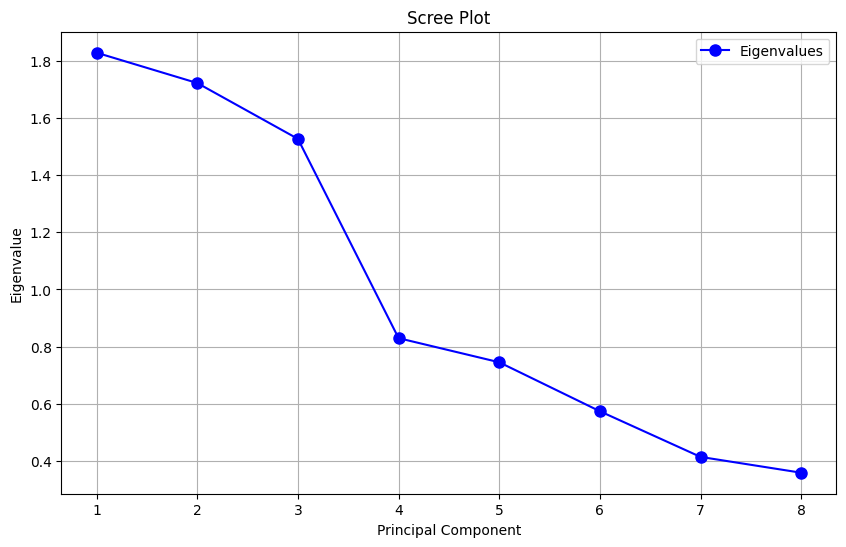

In [88]:
# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, 'o-', markersize=8, color='b', label='Eigenvalues')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, len(sorted_eigenvalues) + 1))
plt.grid(True)
plt.legend()
plt.show()

In [89]:
# Calculate the explained variance ratio for each principal component
explained_variance_ratio = sorted_eigenvalues[:8] / np.sum(sorted_eigenvalues)

# Print the explained variance ratio
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.2f} of the variance")

Principal Component 1: 0.23 of the variance
Principal Component 2: 0.22 of the variance
Principal Component 3: 0.19 of the variance
Principal Component 4: 0.10 of the variance
Principal Component 5: 0.09 of the variance
Principal Component 6: 0.07 of the variance
Principal Component 7: 0.05 of the variance
Principal Component 8: 0.04 of the variance


In [90]:
# Step 5: Select the top 4 eigenvectors (principal components)
n_components = 4
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

# Step 6: Transform the data using the selected eigenvectors
X_train_pca = X_train.dot(selected_eigenvectors)
X_test_pca = X_test.dot(selected_eigenvectors)

# Display the transformed data
print(X_train_pca)
print(X_test_pca)

            0         1         2         3
709  0.453738 -0.597089 -0.757659  0.879181
439  0.505071  0.795238  0.844800  0.180918
840  1.366415 -0.029494  0.726378  0.146799
720 -0.489446 -1.239659  0.285339 -1.309645
39   0.323452 -1.015938 -1.262757 -0.798663
..        ...       ...       ...       ...
505 -1.505822  0.549204 -0.820508  1.638780
639  0.996484 -0.223380  0.766262  0.549193
878  1.258918  0.271954  0.764558  0.108373
824  0.256762 -3.307603  0.672114  1.958436
803  1.069070 -1.154797 -0.895936  0.584889

[712 rows x 4 columns]
            0         1         2         3
619  0.602352  0.472797  0.770437  0.188989
761  1.083295  0.721487  0.790312  0.013140
645 -1.841599  1.717852 -0.773768  1.406814
754 -2.364697 -0.976500  0.409625 -0.901938
556 -1.953913  1.159597 -1.125758 -0.654454
..        ...       ...       ...       ...
106  0.674023 -0.652740  0.251792 -1.624500
270 -0.437054  0.988092  0.806855  0.422939
860  0.684460 -0.178908  0.802816  0.770109
435 -3.4

In [91]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=2000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.costs = []  # To store the cost at each iteration

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = X.shape[0]
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        cost = - (1 / m) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
        return cost

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and store the cost
            cost = self.compute_cost(X, y)
            self.costs.append(cost)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [92]:
# Example usage:
# Initialize the model
log_reg = LogisticRegression(learning_rate=0.01, num_iterations=3000)

# Fit the model
log_reg.fit(X_train_pca, Y_train)

In [93]:
# Predict on the test set
print(Y_test.values)
predictions = log_reg.predict(X_test_pca)
print(predictions)

[0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0]
[0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0]


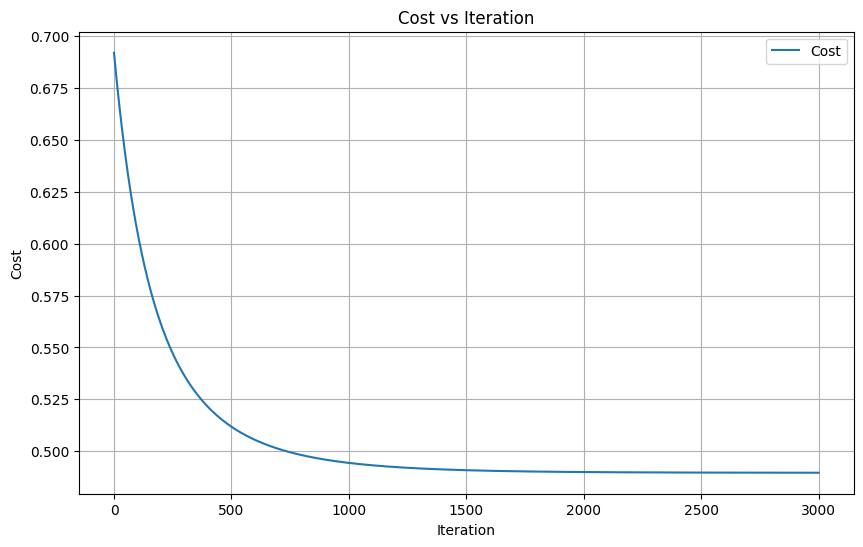

In [94]:
# Plot the cost vs iteration plot
plt.figure(figsize=(10, 6))
plt.plot(range(log_reg.num_iterations), log_reg.costs, label='Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.legend()
plt.grid(True)
plt.show()

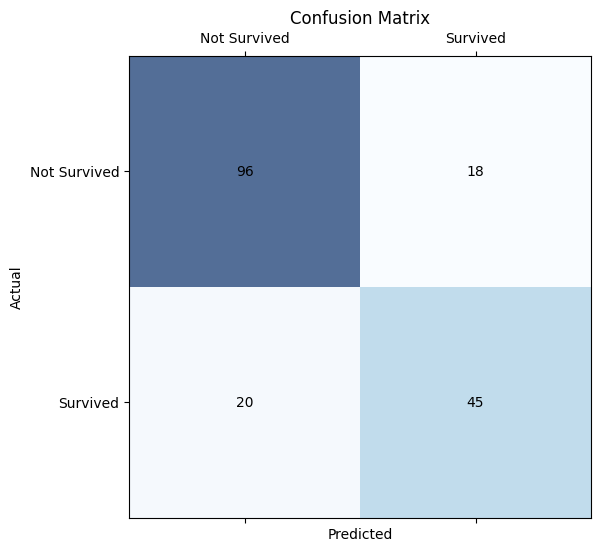

In [95]:
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
cm = confusion_matrix(Y_test, predictions)

# Plot the confusion matrix manually
fig, ax = plt.subplots(figsize=(10, 6))
ax.matshow(cm, cmap='Blues', alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_yticks([0, 1])
ax.set_yticklabels(['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [96]:
# Predict on the training set
train_predictions = log_reg.predict(X_train_pca)
accuracy_train = np.mean(train_predictions == Y_train) * 100
print(f"Training Accuracy: {accuracy_train:.2f}%")


# Calculate accuracy on test set
accuracy_test = np.mean(predictions == Y_test) * 100
print(f"Test Accuracy: {accuracy_test:.2f}%")

# Calculate precision, recall, and F1 score
TP = np.sum((predictions == 1) & (Y_test == 1))
FP = np.sum((predictions == 1) & (Y_test == 0))
FN = np.sum((predictions == 0) & (Y_test == 1))

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Training Accuracy: 78.65%
Test Accuracy: 78.77%

Precision: 0.71
Recall (Sensitivity): 0.69
F1 Score: 0.70
